# Home work #4 (Spaceship Titanic)

Tasks:
- Считывание датафрейма. Считайте датафрейм и сделайте при считывании все признаки строковыми (hints: используйте dtype).

- Выведите несколько первых, последних, случайных строк (случайные используя встроенный метод и сгенерируйте массив из случайных индексов, по которым будут браться строки)

- Преобразования показателей. Обработайте каждый показатель в соответствии с тем типом данных, которым он должен быть (из первого пункта у нас должны быть изначально все показатели str типа)

- Обработайте пропуски

- Попытайтесь перейти от строкового типа данных к числовым

- Посчитайте базовые статистики показателей используя группировку и встроенные методы

- Попробуйте составить несколько предположений о данных, основываясь на полученных результатах

In [92]:
import pandas as pd
import random

In [3]:
df = pd.read_csv("data/spaceship-titanic/train.csv", sep=',')

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [6]:
df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1958,2092_03,Mars,False,NaN,TRAPPIST-1e,13.0,NaN,6726.0,0.0,1605.0,1266.0,0.0,Cray Stpie,False
5930,6293_01,Earth,False,F/1301/P,TRAPPIST-1e,24.0,False,0.0,1049.0,1.0,0.0,0.0,Thel Sweekstarks,False
5555,5923_01,Mars,True,F/1129/S,55 Cancri e,30.0,False,0.0,0.0,0.0,0.0,0.0,Oafron Batte,True
1405,1484_01,Earth,NaN,E/93/P,TRAPPIST-1e,16.0,False,92.0,1.0,884.0,0.0,0.0,Lan Roachoanand,False
1166,1232_02,Europa,False,C/49/S,55 Cancri e,29.0,False,0.0,42.0,0.0,4651.0,661.0,Tope Geraing,False


In [210]:
#создание таблицы из рандомных строк
df_rand = df.sample(3000)
df_rand

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2127,2280_01,Europa,0,18.0,0,20.0,1064.0,0.0,0.0,11643.0,Lesat Femoused,0
2700,2892_03,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Sharie Gallenry,1
8127,8681_02,Mars,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Rionk Facle,1
2821,3042_01,Earth,0,30.0,0,0.0,0.0,301.0,0.0,437.0,Maya Mejiaddox,0
2176,2325_01,Earth,1,22.0,0,0.0,0.0,0.0,0.0,0.0,Kimmie Hurchez,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5681_01,Earth,1,66.0,0,0.0,0.0,0.0,0.0,0.0,Jodip Ellson,1
2038,2182_01,Europa,0,31.0,0,46.0,1935.0,0.0,995.0,1254.0,Unukath Tiouserful,0
5786,6128_02,Earth,0,16.0,0,7.0,0.0,311.0,0.0,683.0,Belly Serry,0
5021,5365_01,Earth,0,60.0,0,943.0,53.0,0.0,0.0,0.0,Pristy Whiters,0


In [8]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
#изменение типа признаков
df = df.astype(dtype=object)
df.dtypes

PassengerId     object
HomePlanet      object
CryoSleep       object
Cabin           object
Destination     object
Age             object
VIP             object
RoomService     object
FoodCourt       object
ShoppingMall    object
Spa             object
VRDeck          object
Name            object
Transported     object
dtype: object

In [10]:
#преобразование показателей
df = df.astype({'Age': float, 'RoomService': float, 'FoodCourt': float, 'ShoppingMall': float, 'Spa': float, 'VRDeck': float})
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

In [11]:
df = df[df.Age.notna()]
df = df.drop("Cabin", axis=1, errors='ignore')
df = df.drop("Destination", axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8514 non-null   object 
 1   HomePlanet    8315 non-null   object 
 2   CryoSleep     8298 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8317 non-null   object 
 5   RoomService   8334 non-null   float64
 6   FoodCourt     8335 non-null   float64
 7   ShoppingMall  8310 non-null   float64
 8   Spa           8332 non-null   float64
 9   VRDeck        8330 non-null   float64
 10  Name          8317 non-null   object 
 11  Transported   8514 non-null   object 
dtypes: float64(6), object(6)
memory usage: 864.7+ KB


In [12]:
df.HomePlanet.value_counts(dropna=False)

Earth     4514
Europa    2085
Mars      1716
NaN        199
Name: HomePlanet, dtype: int64

In [13]:
df["HomePlanet"] = df["HomePlanet"].fillna('Earth')
df.HomePlanet.value_counts(dropna=False)

Earth     4713
Europa    2085
Mars      1716
Name: HomePlanet, dtype: int64

In [33]:
df.CryoSleep.value_counts(dropna=False)
df["CryoSleep"] = df["CryoSleep"].fillna('False')
df.CryoSleep = df.CryoSleep.replace({'False': 0, True: 1})
df.CryoSleep.unique()

array([0, 1], dtype=int64)

In [34]:
df.VIP.value_counts(dropna=False)
df["VIP"] = df["VIP"].fillna(False)
df.VIP = df.VIP.replace({False: 0, True: 1})
df.VIP.unique()

array([0, 1], dtype=int64)

In [35]:
df.Transported = df.Transported.replace({False: 0, True: 1})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8514 non-null   object 
 1   HomePlanet    8514 non-null   object 
 2   CryoSleep     8514 non-null   int64  
 3   Age           8514 non-null   float64
 4   VIP           8514 non-null   int64  
 5   RoomService   8514 non-null   float64
 6   FoodCourt     8514 non-null   float64
 7   ShoppingMall  8514 non-null   float64
 8   Spa           8514 non-null   float64
 9   VRDeck        8514 non-null   float64
 10  Name          8514 non-null   object 
 11  Transported   8514 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 864.7+ KB


In [37]:
df[["RoomService", "VIP"]][df.RoomService != ''].groupby("VIP").agg(["mean", "median", "min", "max"])

RoomService                     
           mean median  min      max
VIP                                 
0    215.495911    0.0  0.0  14327.0
1    458.535354    0.0  0.0   8243.0

In [38]:
df = df.fillna({"RoomService": 0.0, "FoodCourt": 0.0, "ShoppingMall": 0.0, "Spa": 0.0, "VRDeck": 0.0, "Name": "NA"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8514 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8514 non-null   object 
 1   HomePlanet    8514 non-null   object 
 2   CryoSleep     8514 non-null   int64  
 3   Age           8514 non-null   float64
 4   VIP           8514 non-null   int64  
 5   RoomService   8514 non-null   float64
 6   FoodCourt     8514 non-null   float64
 7   ShoppingMall  8514 non-null   float64
 8   Spa           8514 non-null   float64
 9   VRDeck        8514 non-null   float64
 10  Name          8514 non-null   object 
 11  Transported   8514 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 864.7+ KB


In [39]:
df.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8514.000000,8514.000000,8514.000000,8514.000000,8514.000000,8514.000000,8514.000000,8514.000000
mean,0.347075,28.827930,0.023256,221.147992,449.297980,171.043810,303.636951,298.762156,0.503641
std,0.476068,14.489021,0.150724,663.939245,1598.407975,602.376961,1120.733002,1138.416271,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,0.000000,42.000000,62.000000,23.000000,54.000000,40.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [40]:
df.sort_values(by="Age", ascending=True).head(200)
df

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1763,1874_01,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Armene Woodgezalez,0
774,0811_03,Mars,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Phams Nutte,1
773,0811_02,Mars,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Pan Nutte,1
5982,6334_04,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Vick Jenson,1
771,0809_04,Mars,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Wales Meake,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3803,4061_03,Mars,1,1.0,0,0.0,0.0,0.0,0.0,0.0,NA,1
4308,4592_04,Mars,1,1.0,0,0.0,0.0,0.0,0.0,0.0,Pil Carté,1
4392,4663_02,Earth,1,1.0,0,0.0,0.0,0.0,0.0,0.0,Dia Cartez,1
3785,4042_01,Europa,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Mesatz Stewder,1


In [41]:
df[["Age", "Transported"]].groupby("Transported").agg(["mean", "median"])

Age       
                  mean median
Transported                  
0            29.922858   27.0
1            27.748834   26.0

In [42]:
df[["Age"]].agg(["mean", "median"])

,Age
mean,28.82793
median,27.00000


In [43]:
df.Transported.value_counts(normalize=True)

1    0.503641
0    0.496359
Name: Transported, dtype: float64

In [44]:
df.VIP.value_counts(normalize=True)

0    0.976744
1    0.023256
Name: VIP, dtype: float64

In [45]:
df.HomePlanet.value_counts(normalize=True)

Earth     0.553559
Europa    0.244891
Mars      0.201550
Name: HomePlanet, dtype: float64

In [46]:
df.CryoSleep.value_counts(normalize=True)

0    0.652925
1    0.347075
Name: CryoSleep, dtype: float64

In [80]:
df[["CryoSleep", "Transported"]].groupby("CryoSleep").value_counts(normalize=True)

CryoSleep  Transported
0          0              0.663788
           1              0.336212
1          1              0.818613
           0              0.181387
dtype: float64

In [178]:
df[["HomePlanet", "Transported"]].groupby("HomePlanet").value_counts(normalize=True)

HomePlanet  Transported
Earth       0              0.572035
            1              0.427965
Europa      1              0.658513
            0              0.341487
Mars        1              0.523310
            0              0.476690
dtype: float64

In [49]:
df[["VIP", "Transported"]].groupby("VIP").value_counts(normalize=True)

VIP  Transported
0    1              0.506494
     0              0.493506
1    0              0.616162
     1              0.383838
dtype: float64

Resume:

- около 50% пассажиров перешли в иное измерение, из них 43.6% находилось в креосне (при этом в целом на корабле в креосне находилось только 34.7%). Есть гипотеза, что вероятность транспортировки в иное измерение у пассажиров, находящихся в креосне, выше.

- средний возраст пассажиров - 27 лет, средний возраст перешедших в другое измерение - 26 лет;

- из всех пассажиров с Марса транспортировалось - 52.3%, из всех пассажиров с Европы транспортировалось - 65.8%, из всех пассажиров с Земли транспортировалось - 42.7%. При этом численность всех пассажиров с Земли превышает численность всех пассажиров с Марса и с Европы в два раза по каждой группе в отдельности. Есть гипотеза, что вероятность транспортировки в иное измерение у пассажиров с Земли ниже.

<AxesSubplot:ylabel='Density'>

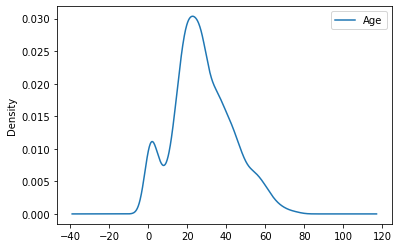

In [73]:
df[["Age"]][df.Transported == 1].plot.density()

<AxesSubplot:ylabel='Density'>

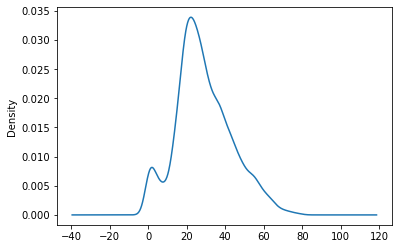

In [85]:
df["Age"].plot.density()

In [175]:
df[["Age"]][df.Transported == 1].value_counts(normalize=True)

Age 
18.0    0.037313
28.0    0.034981
0.0     0.033582
24.0    0.032649
19.0    0.032183
          ...   
69.0    0.000233
73.0    0.000233
76.0    0.000233
77.0    0.000233
78.0    0.000233
Length: 79, dtype: float64

In [151]:
df_age_tr = df[["Age"]][df.Transported == 1].value_counts(normalize=True).to_frame(name = "Probability_age")
df_age_tr.reset_index(inplace = True)
df_age_tr.info()
list_age = df_age_tr["Age"].to_list

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              79 non-null     float64
 1   Probability_age  79 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [79]:
#df[["CryoSleep", "HomePlanet"]][df.Transported == 1].value_counts(normalize=True)

CryoSleep  HomePlanet
0          Earth         0.249534
1          Earth         0.220849
           Europa        0.204757
           Mars          0.138526
0          Europa        0.115438
           Mars          0.070896
dtype: float64

Предсказание

In [211]:
#на рандомной выборке делаем предсказание
df_rand

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2127,2280_01,Europa,0,18.0,0,20.0,1064.0,0.0,0.0,11643.0,Lesat Femoused,0
2700,2892_03,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Sharie Gallenry,1
8127,8681_02,Mars,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Rionk Facle,1
2821,3042_01,Earth,0,30.0,0,0.0,0.0,301.0,0.0,437.0,Maya Mejiaddox,0
2176,2325_01,Earth,1,22.0,0,0.0,0.0,0.0,0.0,0.0,Kimmie Hurchez,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5681_01,Earth,1,66.0,0,0.0,0.0,0.0,0.0,0.0,Jodip Ellson,1
2038,2182_01,Europa,0,31.0,0,46.0,1935.0,0.0,995.0,1254.0,Unukath Tiouserful,0
5786,6128_02,Earth,0,16.0,0,7.0,0.0,311.0,0.0,683.0,Belly Serry,0
5021,5365_01,Earth,0,60.0,0,943.0,53.0,0.0,0.0,0.0,Pristy Whiters,0


In [212]:
df_rand.drop("Transported", axis=1) #убираем факт

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2127,2280_01,Europa,0,18.0,0,20.0,1064.0,0.0,0.0,11643.0,Lesat Femoused
2700,2892_03,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Sharie Gallenry
8127,8681_02,Mars,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Rionk Facle
2821,3042_01,Earth,0,30.0,0,0.0,0.0,301.0,0.0,437.0,Maya Mejiaddox
2176,2325_01,Earth,1,22.0,0,0.0,0.0,0.0,0.0,0.0,Kimmie Hurchez
...,...,...,...,...,...,...,...,...,...,...,...
5315,5681_01,Earth,1,66.0,0,0.0,0.0,0.0,0.0,0.0,Jodip Ellson
2038,2182_01,Europa,0,31.0,0,46.0,1935.0,0.0,995.0,1254.0,Unukath Tiouserful
5786,6128_02,Earth,0,16.0,0,7.0,0.0,311.0,0.0,683.0,Belly Serry
5021,5365_01,Earth,0,60.0,0,943.0,53.0,0.0,0.0,0.0,Pristy Whiters


In [101]:
#вероятность транспортировки по признаку "Креосон"
def probability_cryosleep(df_rand):
    if df_rand["CryoSleep"] == 1:
        val = 0.8186
    else:
        val = 0.1814
    return val

In [213]:
df_rand["Probability_cryosleep"] = df_rand.apply(probability_cryosleep, axis=1)

In [179]:
#вероятность транспортировки по признаку "Дом"
def probability_home(df_rand):
    if df_rand["HomePlanet"] == "Earth":
        val = 0.4280
    elif df_rand["HomePlanet"] == "Europa":
        val = 0.6585
    else:
        val = 0.5233
    return val

In [214]:
df_rand["Probability_home"] = df_rand.apply(probability_home, axis=1)

In [215]:
df_rand

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Probability_cryosleep,Probability_home
2127,2280_01,Europa,0,18.0,0,20.0,1064.0,0.0,0.0,11643.0,Lesat Femoused,0,0.1814,0.6585
2700,2892_03,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Sharie Gallenry,1,0.8186,0.4280
8127,8681_02,Mars,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Rionk Facle,1,0.1814,0.5233
2821,3042_01,Earth,0,30.0,0,0.0,0.0,301.0,0.0,437.0,Maya Mejiaddox,0,0.1814,0.4280
2176,2325_01,Earth,1,22.0,0,0.0,0.0,0.0,0.0,0.0,Kimmie Hurchez,0,0.8186,0.4280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5681_01,Earth,1,66.0,0,0.0,0.0,0.0,0.0,0.0,Jodip Ellson,1,0.8186,0.4280
2038,2182_01,Europa,0,31.0,0,46.0,1935.0,0.0,995.0,1254.0,Unukath Tiouserful,0,0.1814,0.6585
5786,6128_02,Earth,0,16.0,0,7.0,0.0,311.0,0.0,683.0,Belly Serry,0,0.1814,0.4280
5021,5365_01,Earth,0,60.0,0,943.0,53.0,0.0,0.0,0.0,Pristy Whiters,0,0.1814,0.4280


In [164]:
#df_rand = df_rand.merge(df_age_tr, how="left", on="Age")

In [171]:
#df_rand = df_rand.drop("Probability_age_x", axis=1)
#df_rand = df_rand.drop("Probability_age_y", axis=1)

In [216]:
def transp_predict(df_rand):
    if (df_rand["Probability_cryosleep"] + df_rand["Probability_home"]) / 2 > 0.5:
        val = 1
    else:
        val = 0
    return val

In [217]:
df_rand["Transported_predict"] = df_rand.apply(transp_predict, axis=1)

In [218]:
df_rand

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Probability_cryosleep,Probability_home,Transported_predict
2127,2280_01,Europa,0,18.0,0,20.0,1064.0,0.0,0.0,11643.0,Lesat Femoused,0,0.1814,0.6585,0
2700,2892_03,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Sharie Gallenry,1,0.8186,0.4280,1
8127,8681_02,Mars,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Rionk Facle,1,0.1814,0.5233,0
2821,3042_01,Earth,0,30.0,0,0.0,0.0,301.0,0.0,437.0,Maya Mejiaddox,0,0.1814,0.4280,0
2176,2325_01,Earth,1,22.0,0,0.0,0.0,0.0,0.0,0.0,Kimmie Hurchez,0,0.8186,0.4280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,5681_01,Earth,1,66.0,0,0.0,0.0,0.0,0.0,0.0,Jodip Ellson,1,0.8186,0.4280,1
2038,2182_01,Europa,0,31.0,0,46.0,1935.0,0.0,995.0,1254.0,Unukath Tiouserful,0,0.1814,0.6585,0
5786,6128_02,Earth,0,16.0,0,7.0,0.0,311.0,0.0,683.0,Belly Serry,0,0.1814,0.4280,0
5021,5365_01,Earth,0,60.0,0,943.0,53.0,0.0,0.0,0.0,Pristy Whiters,0,0.1814,0.4280,0


In [219]:
df_rand = df_rand.merge(df[["PassengerId", "Transported"]], how="left", on="PassengerId")

In [220]:
def compare(df_rand):
    if df_rand["Transported_predict"] == df_rand["Transported_y"]:
        val = 1
    else:
        val = 0
    return val

In [221]:
df_rand["Compare"] = df_rand.apply(compare, axis=1)

In [222]:
df_rand

,PassengerId,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_x,Probability_cryosleep,Probability_home,Transported_predict,Transported_y,Compare
0,2280_01,Europa,0,18.0,0,20.0,1064.0,0.0,0.0,11643.0,Lesat Femoused,0,0.1814,0.6585,0,0,1
1,2892_03,Earth,1,0.0,0,0.0,0.0,0.0,0.0,0.0,Sharie Gallenry,1,0.8186,0.4280,1,1,1
2,8681_02,Mars,0,1.0,0,0.0,0.0,0.0,0.0,0.0,Rionk Facle,1,0.1814,0.5233,0,1,0
3,3042_01,Earth,0,30.0,0,0.0,0.0,301.0,0.0,437.0,Maya Mejiaddox,0,0.1814,0.4280,0,0,1
4,2325_01,Earth,1,22.0,0,0.0,0.0,0.0,0.0,0.0,Kimmie Hurchez,0,0.8186,0.4280,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,5681_01,Earth,1,66.0,0,0.0,0.0,0.0,0.0,0.0,Jodip Ellson,1,0.8186,0.4280,1,1,1
2996,2182_01,Europa,0,31.0,0,46.0,1935.0,0.0,995.0,1254.0,Unukath Tiouserful,0,0.1814,0.6585,0,0,1
2997,6128_02,Earth,0,16.0,0,7.0,0.0,311.0,0.0,683.0,Belly Serry,0,0.1814,0.4280,0,0,1
2998,5365_01,Earth,0,60.0,0,943.0,53.0,0.0,0.0,0.0,Pristy Whiters,0,0.1814,0.4280,0,0,1


In [223]:
#успешность предсказания
#1 - есть совпадение, 0 - нет совпадения
df_rand["Compare"].value_counts(normalize=True)

1    0.709
0    0.291
Name: Compare, dtype: float64